In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/beegfs/scratch_copy/ahringer/jj374/lab/relmapping


In [2]:
# Build gdf
def addon_tss_maj(df_regl):
    def tss_maj(annot_fwd, annot_rev, tss_fwd, tss_rev, mode_count_fwd, mode_count_rev):
        index_fwd = config['annot_strand'].index(annot_fwd)
        index_rev = config['annot_strand'].index(annot_rev)
        if index_fwd < index_rev:
            return tss_fwd
        elif index_fwd > index_rev:
            return tss_rev
        elif mode_count_fwd >= mode_count_rev:
            return tss_fwd
        else:
            return tss_rev

    annot_ = 'annot_eLife_revised/_annot'
    df_scap_fwd = pd.read_csv(os.path.join(annot_, 'metrics_scap', 'scap_fwd.tsv'), sep='\t')
    df_scap_rev = pd.read_csv(os.path.join(annot_, 'metrics_scap', 'scap_rev.tsv'), sep='\t')

    df_regl['tss_maj'] = [* map(tss_maj, 
        df_regl['annot_fwd'], df_regl['annot_rev'],
        df_regl['tss_fwd'], df_regl['tss_rev'], 
        df_scap_fwd['scap_mode_count'], df_scap_rev['scap_mode_count']
    )]

def addon_strand_maj(df_regl):
    def strand_maj(annot_fwd, annot_rev, tss_fwd, tss_rev, mode_count_fwd, mode_count_rev):
        index_fwd = config['annot_strand'].index(annot_fwd)
        index_rev = config['annot_strand'].index(annot_rev)
        if index_fwd < index_rev:
            return '+'
        elif index_fwd > index_rev:
            return '-'
        elif mode_count_fwd >= mode_count_rev:
            return '+'
        else:
            return '-'

    annot_ = 'annot_eLife_revised/_annot'
    df_scap_fwd = pd.read_csv(os.path.join(annot_, 'metrics_scap', 'scap_fwd.tsv'), sep='\t')
    df_scap_rev = pd.read_csv(os.path.join(annot_, 'metrics_scap', 'scap_rev.tsv'), sep='\t')

    df_regl['strand_maj'] = [* map(strand_maj, 
        df_regl['annot_fwd'], df_regl['annot_rev'],
        df_regl['tss_fwd'], df_regl['tss_rev'], 
        df_scap_fwd['scap_mode_count'], df_scap_rev['scap_mode_count']
    )]

df_regl = regl_Apr27()
addon_tss_maj(df_regl)
addon_strand_maj(df_regl)
addon_H3K4me3(df_regl)

gdf = yp.GenomicDataFrame(df_regl, strand_column='strand_maj')

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: Mean of empty slice


13054 of 42245 sites with CV values via promoter annotation
17950 of 42245 sites with CV values via "associated gene"
H3K4me3 wt_emb True


/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: All-NaN slice encountered
  


H3K4me3 wt_l1 True
H3K4me3 wt_l2 True
H3K4me3 wt_l3 True
H3K4me3 wt_l4 True
H3K4me3 wt_ya True
gdf: pos_column unspecified, reverting to mean(start, end)


In [3]:
#fp_ = pf('Chen13_INR_2', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_INR_3', 'scanMotifGenomeWide', '_5fwd.bw', 'motifs')
#fp_ = pf('Chen13_INR_4', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_INR_5', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_INR_6', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_INR_7', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Sloutskin2015_mammalian_Initiator', 'scanMotifGenomeWide', '_2fwd.bw', 'motifs')
#gdf.add_track('Inr_fwd', fp_, flank_len=50, bin_size=1, f_bin=np.nanmean, pos_column='tss_maj')
fp_fwd = pf('Sloutskin2015_mammalian_Initiator', 'scanMotifGenomeWide', '_2fwd.bw', 'motifs')
fp_rev = pf('Sloutskin2015_mammalian_Initiator', 'scanMotifGenomeWide', '_2rev.bw', 'motifs')
gdf.add_stranded('Inr_maj', 'Inr_min', fp_fwd, fp_rev, flank_len=50, bin_size=1, f_bin=np.nanmean, pos_column='tss_maj')

#fp_ = pf('TATAAAA_Saito2013', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('TATAAAA_1', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_TATA_01_4', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_TATA_01_5', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_TATA_01_8', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_TATA_01_8', 'scanMotifGenomeWide', '_0fwd.bw', 'motifs')
#fp_ = pf('Chen13_TATA_01_9', 'scanMotifGenomeWide', '.bed', 'motifs')

#fp_ = pf('Saito2013_TATA', 'scanMotifGenomeWide', '_0fwd.bw', 'motifs')
#fp_ = pf('Roy2015_TATA1', 'scanMotifGenomeWide', '_0fwd.bw', 'motifs')
#fp_ = pf('Sloutskin2015_TATA_box', 'scanMotifGenomeWide', '_0fwd.bw', 'motifs')
#gdf.add_track('TATA_fwd', fp_, flank_len=50, bin_size=1, f_bin=np.nanmean, pos_column='tss_maj')
fp_fwd = pf('Sloutskin2015_TATA_box', 'scanMotifGenomeWide', '_0fwd.bw', 'motifs')
fp_rev = pf('Sloutskin2015_TATA_box', 'scanMotifGenomeWide', '_0rev.bw', 'motifs')
gdf.add_stranded('TATA_maj', 'TATA_min', fp_fwd, fp_rev, flank_len=50, bin_size=1, f_bin=np.nanmean, pos_column='tss_maj')

fp_ = 'etc/CpG_ce10_sw200bp.bw'
gdf.add_stranded('CpG_maj', 'CpG_min', fp_, fp_, flank_len=500, bin_size=5, f_bin=np.nanmean)

mread_regions True Sloutskin2015_mammalian_Initiator.scanMotifGenomeWide_2fwd.bw.mread_regions_2c527d86404d3da5129a3e6f4e0de5e8.tmp
mread_regions True Sloutskin2015_mammalian_Initiator.scanMotifGenomeWide_2rev.bw.mread_regions_cad0923bca614907e2f9fcc5ef917409.tmp
mread_regions True Sloutskin2015_TATA_box.scanMotifGenomeWide_0fwd.bw.mread_regions_1d8fb21b727230649eea6c14c7027488.tmp
mread_regions True Sloutskin2015_TATA_box.scanMotifGenomeWide_0rev.bw.mread_regions_02af2723c3efb8454cffd4e1aa77a14c.tmp
mread_regions True CpG_ce10_sw200bp.bw.mread_regions_85b1b18a3c636a9bf248fde24fc2fd1e.tmp
mread_regions True CpG_ce10_sw200bp.bw.mread_regions_85b1b18a3c636a9bf248fde24fc2fd1e.tmp


In [4]:
# Fig3B: sort/bin by H3K4me3
label_h = 'Top H3K4me3'
label_m = 'Medium H3K4me3'
label_l = 'Bottom H3K4me3'
fp_fig = 'annot_eLife_revised/_fig/Fig3B_Inr_TATA_CpG_sortbyH3K4me3.png'
gdf_p = gdf.query('(annot == "coding_promoter")').sort(['H3K4me3_mean_mean'], ascending=False)
gdf_e = gdf.query('(annot == "putative_enhancer")').sort(['H3K4me3_mean_mean'], ascending=False)

"""
# Fig3S1B: sort/bin by CV of the (associated) gene
label_h = 'Bottom CV'#'Stable CV'
label_m = 'Intermediate CV'
label_l = 'Top CV'#'Regulated CV'
fp_fig = 'annot_eLife_revised/_fig/Fig3S1B_Inr_TATA_CpG_sortbyCV.png'
gdf_p = gdf.query('(annot == "coding_promoter") & (CV == CV)').sort(['CV'])
gdf_e = gdf.query('(annot == "putative_enhancer") & (CV == CV)').sort(['CV'])
"""

gdf_p0 = gdf_p.get_subset(np.array_split(gdf_p.r.index, 3)[0])
gdf_p1 = gdf_p.get_subset(np.array_split(gdf_p.r.index, 3)[1])
gdf_p2 = gdf_p.get_subset(np.array_split(gdf_p.r.index, 3)[2])

gdf_e0 = gdf_e.get_subset(np.array_split(gdf_e.r.index, 3)[0])
gdf_e1 = gdf_e.get_subset(np.array_split(gdf_e.r.index, 3)[1])
gdf_e2 = gdf_e.get_subset(np.array_split(gdf_e.r.index, 3)[2])

gdf_p0.t['Inr_maj'].m *= 100.0
gdf_p1.t['Inr_maj'].m *= 100.0
gdf_p2.t['Inr_maj'].m *= 100.0
gdf_p0.t['TATA_maj'].m *= 100.0
gdf_p1.t['TATA_maj'].m *= 100.0
gdf_p2.t['TATA_maj'].m *= 100.0

gdf_e0.t['Inr_maj'].m *= 100.0
gdf_e1.t['Inr_maj'].m *= 100.0
gdf_e2.t['Inr_maj'].m *= 100.0
gdf_e0.t['TATA_maj'].m *= 100.0
gdf_e1.t['TATA_maj'].m *= 100.0
gdf_e2.t['TATA_maj'].m *= 100.0

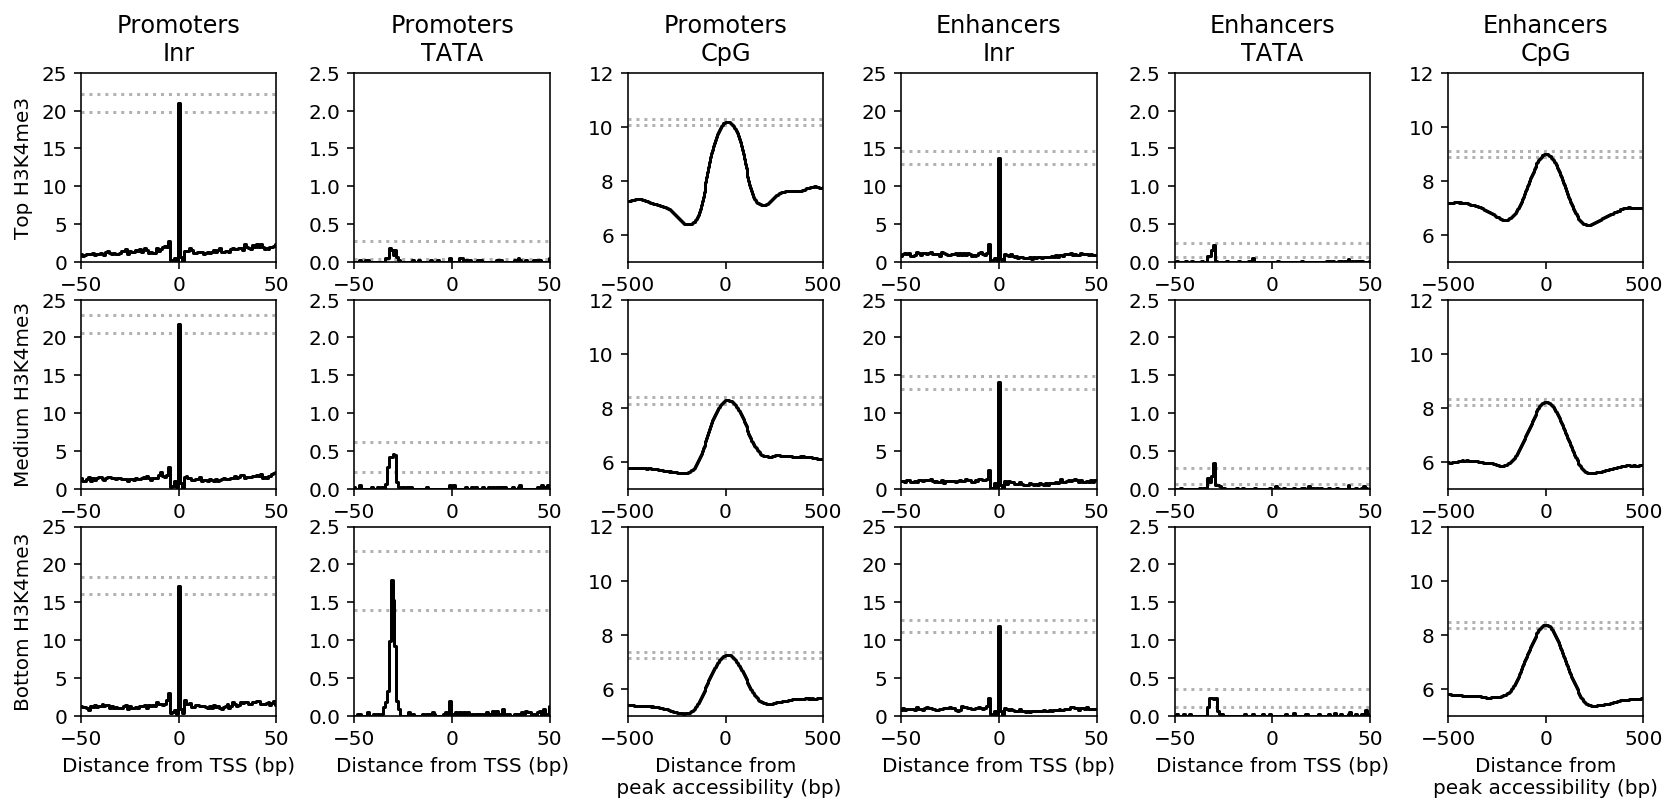

In [5]:
# Each profile on separate subplots
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(wspace=0.4)
ylim_inr = (0, 25)
ylim_tata = (0, 2.5)
ylim_CpG = (5, 12)

plt.subplot(4,6,1)
gdf_p0.t['Inr_maj'].plot(f=np.nanmean, color='k')
gdf_p0.t['Inr_maj'].errorbar(plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_inr)
plt.gca().set_yticks([0, 5, 10, 15, 20, 25])
plt.gca().set_title('Promoters\nInr')
plt.gca().set_ylabel(label_h)

plt.subplot(4,6,7)
gdf_p1.t['Inr_maj'].plot(f=np.nanmean, color='k')
gdf_p1.t['Inr_maj'].errorbar(plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_inr)
plt.gca().set_yticks([0, 5, 10, 15, 20, 25])
plt.gca().set_ylabel(label_m)

plt.subplot(4,6,13)
gdf_p2.t['Inr_maj'].plot(f=np.nanmean, color='k')
gdf_p2.t['Inr_maj'].errorbar(plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_inr)
plt.gca().set_yticks([0, 5, 10, 15, 20, 25])
plt.gca().set_xlabel('Distance from TSS (bp)')
plt.gca().set_ylabel(label_l)

plt.subplot(4,6,2)
gdf_p0.t['TATA_maj'].plot(f=np.nanmean, color='k')
gdf_p0.t['TATA_maj'].errorbar(l_index=[19], plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_tata)
plt.gca().set_yticks([0, 0.5, 1, 1.5, 2, 2.5])
plt.gca().set_title('Promoters\nTATA')

plt.subplot(4,6,8)
gdf_p1.t['TATA_maj'].plot(f=np.nanmean, color='k')
gdf_p1.t['TATA_maj'].errorbar(l_index=[19], plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_tata)
plt.gca().set_yticks([0, 0.5, 1, 1.5, 2, 2.5])

plt.subplot(4,6,14)
gdf_p2.t['TATA_maj'].plot(f=np.nanmean, color='k')
gdf_p2.t['TATA_maj'].errorbar(l_index=[19], plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_tata)
plt.gca().set_yticks([0, 0.5, 1, 1.5, 2, 2.5])
plt.gca().set_xlabel('Distance from TSS (bp)')

plt.subplot(4,6,3)
gdf_p0.t['CpG_maj'].plot(f=np.nanmean, color='k')
gdf_p0.t['CpG_maj'].errorbar(plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_CpG)
plt.gca().set_title('Promoters\nCpG')

plt.subplot(4,6,9)
gdf_p1.t['CpG_maj'].plot(f=np.nanmean, color='k')
gdf_p1.t['CpG_maj'].errorbar(plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_CpG)

plt.subplot(4,6,15)
gdf_p2.t['CpG_maj'].plot(f=np.nanmean, color='k')
gdf_p2.t['CpG_maj'].errorbar(plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_CpG)
plt.gca().set_xlabel('Distance from\n peak accessibility (bp)')

plt.subplot(4,6,4)
gdf_e0.t['Inr_maj'].plot(f=np.nanmean, color='k')
gdf_e0.t['Inr_maj'].errorbar(plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_inr)
plt.gca().set_yticks([0, 5, 10, 15, 20, 25])
plt.gca().set_title('Enhancers\nInr')

plt.subplot(4,6,10)
gdf_e1.t['Inr_maj'].plot(f=np.nanmean, color='k')
gdf_e1.t['Inr_maj'].errorbar(plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_inr)
plt.gca().set_yticks([0, 5, 10, 15, 20, 25])

plt.subplot(4,6,16)
gdf_e2.t['Inr_maj'].plot(f=np.nanmean, color='k')
gdf_e2.t['Inr_maj'].errorbar(plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_inr)
plt.gca().set_yticks([0, 5, 10, 15, 20, 25])
plt.gca().set_xlabel('Distance from TSS (bp)')

plt.subplot(4,6,5)
gdf_e0.t['TATA_maj'].plot(f=np.nanmean, color='k')
gdf_e0.t['TATA_maj'].errorbar(l_index=[19], plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_tata)
plt.gca().set_yticks([0, 0.5, 1, 1.5, 2, 2.5])
plt.gca().set_title('Enhancers\nTATA')

plt.subplot(4,6,11)
gdf_e1.t['TATA_maj'].plot(f=np.nanmean, color='k')
gdf_e1.t['TATA_maj'].errorbar(l_index=[19], plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_tata)
plt.gca().set_yticks([0, 0.5, 1, 1.5, 2, 2.5])

plt.subplot(4,6,17)
gdf_e2.t['TATA_maj'].plot(f=np.nanmean, color='k')
gdf_e2.t['TATA_maj'].errorbar(l_index=[19], plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_tata)
plt.gca().set_yticks([0, 0.5, 1, 1.5, 2, 2.5])
plt.gca().set_xlabel('Distance from TSS (bp)')

plt.subplot(4,6,6)
gdf_e0.t['CpG_maj'].plot(f=np.nanmean, color='k')
gdf_e0.t['CpG_maj'].errorbar(plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_CpG)
plt.gca().set_title('Enhancers\nCpG')

plt.subplot(4,6,12)
gdf_e1.t['CpG_maj'].plot(f=np.nanmean, color='k')
gdf_e1.t['CpG_maj'].errorbar(plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_CpG)

plt.subplot(4,6,18)
gdf_e2.t['CpG_maj'].plot(f=np.nanmean, color='k')
gdf_e2.t['CpG_maj'].errorbar(plot_errorbar=False, plot_hline=True)
plt.gca().set_ylim(*ylim_CpG)
plt.gca().set_xlabel('Distance from\npeak accessibility (bp)')

plt.savefig(fp_fig, bbox_inches='tight', dpi=600, transparent=True)